In [25]:
from openeye import oechem, oedepict
import pandas as pd
from openmoltools.openeye import get_charges, smiles_to_oemol, generate_conformers
from torsionfit.qmscan import fragment
from IPython.display import display
import oenotebook as oenb
import time

In [2]:
kinase_inhibitors = pd.read_csv('../clinical-kinase-inhibitors.csv')
df = kinase_inhibitors[kinase_inhibitors['inhibitor'] == 'Axitinib']
mol = smiles_to_oemol(df.smiles.values[0])

In [30]:
time1 = time.time()
fragments = {}
smiles_all = []
smiles_all_set = set()
for i, inhibitor in kinase_inhibitors.iterrows():
    print('Fragmenting {}'.format(inhibitor['inhibitor']))
    mol = smiles_to_oemol(inhibitor['smiles'])
    charged, frags = fragment.generate_fragments(mol)
    smiles = fragment.smiles_with_combined(frags, charged)
    smiles_all = smiles_all + list(smiles.keys())
    smiles_all_set.update(list(smiles.keys()))
    fragments[inhibitor['inhibitor']] = smiles
time2 = time.time()
print(time2-time1)

Fragmenting Imatinib
Fragmenting Dasatinib
Fragmenting Nilotinib
Fragmenting Bosutinib
Fragmenting Ponatinib
Fragmenting Gefitinib
Fragmenting Erlotinib
Fragmenting Afatinib
Fragmenting Lapatinib
Fragmenting Sorafenib
Fragmenting Sunitinib
Fragmenting Pazopanib
Fragmenting Vandetanib
Fragmenting Axitinib
Fragmenting Regorafenib
Fragmenting Crizotinib
Fragmenting Ceritinib
Fragmenting Vemurafenib
Fragmenting Dabrafenib
Fragmenting Ruxolitinib
Fragmenting Tofacitinib
Fragmenting Cabozantinib
Fragmenting Ibrutinib
Fragmenting Nintedanib
Fragmenting Trametinib
Fragmenting Idelalisib
Fragmenting Lenvatinib
Fragmenting Palbociclib
Fragmenting Cobimetinib
Fragmenting Osimertinib
Fragmenting Alectinib
Fragmenting Brigatinib
Fragmenting Cabozantinib
Fragmenting Midostaurin
Fragmenting Neratinib
Fragmenting Abemaciclib
Fragmenting Acalabrutinib
Fragmenting Ribociclib
663.4774198532104


In [43]:
# Filter by # of rotatable bond
# First create a .smi file with all the smiles string so an index file can be written for 
def to_smi(smiles, fname):
    outf = open('{}.smi'.format(fname), 'w')
    smiles_list = map(lambda x: x+"\n", list(smiles))
    outf.writelines(smiles_list)
    outf.close()
    

In [44]:
%time
to_smi(smiles_all_set, '/Users/chayastern/src/ChayaSt/torsionfit_examples/kinase_inhibitors/fragmentation/test')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 21.9 µs


In [47]:
import os
# Create OpeneEye database
def CreateMolDatabaseIndexFile(ifname):
    idxfname = oechem.OEGetMolDatabaseIdxFileName(ifname)

    if os.path.exists(idxfname):
        oechem.OEThrow.Warning("%s index file already exists" % idxfname)
    elif not oechem. OECreateMolDatabaseIdx(ifname):
        oechem.OEThrow.Warning("Unable to create %s molecule index file", idxfname)

In [50]:
%time
CreateMolDatabaseIndexFile('/Users/chayastern/src/ChayaSt/torsionfit_examples/kinase_inhibitors/fragmentation/test.smi')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [33]:
def sort_by_rotbond(ifs, ofs):
    

[<oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b576cf0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b576ed0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b576ba0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b2a80f0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b2a8120> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b2a80c0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b576330> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b5763f0> >,
 <oechem.OEAtomBondSet; proxy of <Swig Object of type 'OEChem::OEAtomBondSet *' at 0x11b576480> >]

In [7]:
# Convert to smiles. This funciton removes redundant smiles
smiles = fragment.frag_to_smiles(combined_list, charged)

NameError: name 'combined_list' is not defined

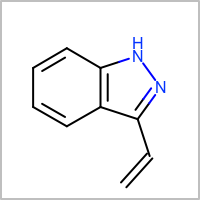

In [15]:
oenb.draw_smiles(list(smiles.keys())[0])

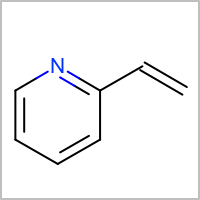

In [10]:
oenb.draw_smiles(list(smiles.keys())[1])

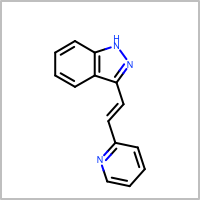

In [11]:
oenb.draw_smiles(list(smiles.keys())[2])

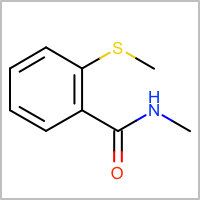

In [12]:
oenb.draw_smiles(list(smiles.keys())[3])

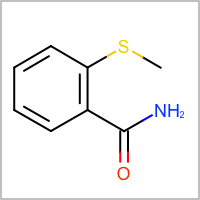

In [13]:
oenb.draw_smiles(list(smiles.keys())[4])

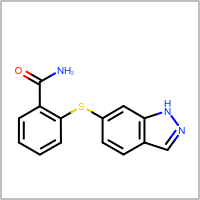

In [14]:
oenb.draw_smiles(list(smiles.keys())[5])

In [98]:
for tor in oechem.OEGetTorsions(test_mol):
    print(tor.radians)
    print(tor.a, tor.b, tor.c, tor.d) #, tor.b, tor.c, tor.d])

5.93433015100365e-07
 0 C  1 C  2 C 10 N
-3.1415254319081467
 0 C  1 C  2 C  3 C
3.1115103674397786
13 H  1 C  2 C 10 N
-0.030015657906242034
13 H  1 C  2 C  3 C


In [92]:
test_mol = smiles_to_oemol(list(smiles.keys())[0])

In [93]:
test_mol = get_charges(test_mol, keep_confs=1)

In [77]:
for bond in test_mol.GetBonds():
    print(bond)
    print(bond.GetData())

 0 (0C-1C)
{'WibergBondOrder': 1.9162286520004272}
 1 (1C-2C)
{'WibergBondOrder': 1.0215425491333008}
 2 (2C-10N)
{'WibergBondOrder': 1.6145367622375488}
 3 (2C-3C)
{'WibergBondOrder': 1.1062740087509155}
 4 (3C-8C)
{'WibergBondOrder': 1.2886050939559937}
 5 (3C-4C)
{'WibergBondOrder': 1.3136489391326904}
 6 (4C-5C)
{'WibergBondOrder': 1.4944629669189453}
 7 (5C-6C)
{'WibergBondOrder': 1.330786108970642}
 8 (6C-7C)
{'WibergBondOrder': 1.499855875968933}
 9 (7C-8C)
{'WibergBondOrder': 1.2851083278656006}
10 (8C-9N)
{'WibergBondOrder': 1.106734037399292}
11 (9N-10N)
{'WibergBondOrder': 1.1383013725280762}
12 (0C-11H)
{'WibergBondOrder': 0.9581797122955322}
13 (0C-12H)
{'WibergBondOrder': 0.9543251395225525}
14 (1C-13H)
{'WibergBondOrder': 0.944911539554596}
15 (4C-14H)
{'WibergBondOrder': 0.9459644556045532}
16 (5C-15H)
{'WibergBondOrder': 0.9491660594940186}
17 (6C-16H)
{'WibergBondOrder': 0.9486057162284851}
18 (7C-17H)
{'WibergBondOrder': 0.9467200636863708}
19 (9N-18H)
{'WibergBondOr

In [76]:
pdb = oechem.oemolostream('test.pdb')
oechem.OEWritePDBFile(pdb, test_mol)

In [79]:
def png_atoms_labeled(smiles, mol, fname):
    #test_simple ="c1cc(N)cc(S(=O)(=O)O)c1"
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smiles)
    oedepict.OEPrepareDepiction(mol)

    width, height = 300, 200

    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    opts.SetAtomPropertyFunctor(oedepict.OEDisplayAtomIdx())
    opts.SetAtomPropLabelFont(oedepict.OEFont(oechem.OEDarkGreen))

    disp = oedepict.OE2DMolDisplay(mol, opts)
    return oedepict.OERenderMolecule(fname, disp)

In [81]:
png_atoms_labeled(list(smiles.keys())[0], test_mol, 'test.png')

True

In [22]:
beg = bond.GetBgn()
end = bond.GetEnd()

In [24]:
atoms, bonds = fragment.iterate_nbratoms(charged, bond, beg, end, tagged_funcgroup, tagged_rings)

In [25]:
atoms2, bonds2 = fragment.iterate_nbratoms(charged, bond, end, beg, tagged_funcgroup, tagged_rings)

In [27]:
atoms, bonds

({0, 2}, {0, 1})

In [28]:
atoms2, bonds2

({4, 5, 6, 41, 42, 44}, {3, 4})

In [81]:
for k, mol in enumerate(confs.GetConfs()):
        #if k == conformer:
            # Standardize will override molecular properties(atom names etc.)
            #if standardize:
                #oechem.OEWriteMolecule(ofs, mol)
            #else:
    oechem.OEWriteMol2File(ofs, mol)

In [105]:

def molecule_to_mol2(molecule, tripos_mol2_filename=None, conformer=None, residue_name="MOL", standardize=True):
    """Convert OE molecule to tripos mol2 file.
    Parameters
    ----------
    molecule : openeye.oechem.OEGraphMol
        The molecule to be converted.
    tripos_mol2_filename : str, optional, default=None
        Output filename.  If None, will create a filename similar to
        name.tripos.mol2, where name is the name of the OE molecule.
    conformer : int, optional, default=0
        Save this frame
    residue_name : str, optional, default="MOL"
        OpenEye writes mol2 files with <0> as the residue / ligand name.
        This chokes many mol2 parsers, so we replace it with a string of
        your choosing.
    standardize: bool, optional, default=True
        Use a high-level writer, which will standardize the molecular properties.
        Set this to false if you wish to retain things such as atom names.
        In this case, a low-level writer will be used.
    Returns
    -------
    tripos_mol2_filename : str
        Filename of output tripos mol2 file
    """

    #oechem = import_("openeye.oechem")
    if not oechem.OEChemIsLicensed(): raise(ImportError("Need License for oechem!"))

    # Get molecule name.
    molecule_name = molecule.GetTitle()
    #logger.debug(molecule_name)

    # Write molecule as Tripos mol2.
    if tripos_mol2_filename is None:
        tripos_mol2_filename = molecule_name + '.tripos.mol2'

    ofs = oechem.oemolostream(tripos_mol2_filename)
    ofs.SetFormat(oechem.OEFormat_MOL2H)
    for k, mol in enumerate(molecule.GetConfs()):     
        if k == conformer or not conformer:
            # Standardize will override molecular properties(atom names etc.)
            if standardize:
                oechem.OEWriteMolecule(ofs, mol)
            else:
                oechem.OEWriteMol2File(ofs, mol)

    ofs.close()

    # Replace <0> substructure names with valid text.
    infile = open(tripos_mol2_filename, 'r')
    lines = infile.readlines()
    infile.close()
    newlines = [line.replace('<0>', residue_name) for line in lines]
    outfile = open(tripos_mol2_filename, 'w')
    outfile.writelines(newlines)
    outfile.close()

    return molecule_name, tripos_mol2_filename

In [106]:
molecule_to_mol2(confs, tripos_mol2_filename='Abemaciclib.mol2')

('~{N}-[5-[(4-ethylpiperazin-1-yl)methyl]-2-pyridyl]-5-fluoro-4-(7-fluoro-3-isopropyl-2-methyl-benzimidazol-5-yl)pyrimidin-2-amine',
 'Abemaciclib.mol2')

In [66]:
for conf in confs.GetConfs():
    print(conf.GetEnergy())

70.9164810180664
71.04487609863281
71.12257385253906
71.21248626708984
71.34494018554688
71.39234924316406
71.43254089355469
71.47809600830078
72.129638671875
72.18033599853516
73.14907836914062
73.16320037841797
73.23426818847656
73.37040710449219
73.47356414794922
73.52058410644531
73.57728576660156
73.62266540527344
73.73136138916016
73.89340209960938
74.07957458496094
74.13300323486328
74.17097473144531
74.4837646484375
74.50871276855469
74.60845947265625
74.65203094482422
74.84722137451172
74.97966766357422
75.09771728515625
75.10416412353516
75.13105773925781
75.32039642333984
75.3349838256836
75.37811279296875
75.38319396972656
75.57232666015625
75.576904296875
75.84466552734375
76.46653747558594
76.47420501708984
76.67639923095703
76.83241271972656
76.84050750732422
76.9266357421875
77.13799285888672
77.2746810913086
77.3985366821289
77.4027099609375
77.41227722167969
77.57379150390625
77.71334075927734
77.82658386230469
77.90534973144531
77.9201431274414
77.94947052001953
77.9

In [102]:
test = None

In [104]:
if not test or test==0:
    print('test')

test


In [46]:
def png_atoms_labeled(smiles, mol, fname):
    #test_simple ="c1cc(N)cc(S(=O)(=O)O)c1"
    mol = oechem.OEGraphMol()
    oechem.OESmilesToMol(mol, smiles)
    oedepict.OEPrepareDepiction(mol)

    width, height = 600, 400

    opts = oedepict.OE2DMolDisplayOptions(width, height, oedepict.OEScale_AutoScale)
    opts.SetBondPropertyFunctor(oedepict.OEDisplayBondIdx())
    opts.SetBondPropLabelFont(oedepict.OEFont(oechem.OEDarkGreen))

    disp = oedepict.OE2DMolDisplay(mol, opts)
    return oedepict.OERenderMolecule(fname, disp)

In [47]:
png_atoms_labeled(df.smiles.values[0], mol, 'afatinib_bidx.png')

True

In [48]:
rot_bond = charged.GetBond(oechem.OEHasBondIdx(8))

In [50]:
print(rot_bond)


 8 (8N-9C)


In [60]:
ortho_bond = charged.GetBond(oechem.OEHasBondIdx(30))

In [61]:
print(ortho_bond)

30 (10C-28O)


In [64]:
next_bond = charged.GetBond(oechem.OEHasBondIdx(9))

In [65]:
fragment._is_ortho(rot_bond=rot_bond, next_bond=next_bond, bond=ortho_bond)

True

In [ ]:
mol = smiles_to_oemol(inhibitor['smiles'])
charged, frags = fragment.generate_fragments(mol)